In [1]:
#Importing data from csv
from pandas import read_csv
import pandas as pd
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', None)

zerg_data = read_csv('../Output/ZergMarch.csv', header=0, index_col=False)
display(zerg_data)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,baneling,banelingnest,broodling,broodlingescort,changeling,drone,creeptumor,evolutionchamber,disruptor,extractor,hatchery,hive,hydralisk,hydraliskden,infestationpit,infestor,lair,locust,mutalisk,nydusnetwork,nydusworm,overlord,queen,roach,roachwarren,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,win
0,0,Acropolis LE,us,551,Z,Z,0.0,1,0,Player 1 - soO (Zerg),12,12.0,14,50,0,0,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,Acropolis LE,us,551,Z,Z,266.0,480,30,Player 1 - soO (Zerg),13,14.0,14,55,755,150,1100,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,Acropolis LE,us,551,Z,Z,210.0,960,60,Player 1 - soO (Zerg),14,16.0,22,240,839,100,1250,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,Acropolis LE,us,551,Z,Z,176.4,1440,90,Player 1 - soO (Zerg),16,18.0,22,90,867,450,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,Acropolis LE,us,551,Z,Z,179.2,1920,120,Player 1 - soO (Zerg),16,18.0,22,95,923,775,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81277,2481,Eternal Empire LE,eu,1610,Z,T,284.2,33600,2100,Player 1 - Reynor (Zerg),68,186.0,204,1354,2855,1000,16150,5850,41656,1377,403,350,3650,2950,8181,0,1,0,0,0,68,0,2,0,7,6,2,38,1,1,0,0,0,0,0,0,26,4,0,0,1,0,1,9,0,0,0,3,71,1
81278,2481,Eternal Empire LE,eu,1610,Z,T,295.4,34080,2130,Player 1 - Reynor (Zerg),68,187.5,204,1509,2911,700,16575,6275,42431,1363,380,150,3900,3200,8281,0,1,0,0,0,68,0,2,0,7,6,2,43,1,1,0,0,0,0,0,0,26,4,0,0,1,0,1,9,0,0,0,3,68,1
81279,2481,Eternal Empire LE,eu,1610,Z,T,379.4,34560,2160,Player 1 - Reynor (Zerg),68,191.5,204,1314,2743,500,16975,6775,43131,1503,425,0,3900,3200,8431,0,1,0,0,0,68,0,2,0,7,6,2,45,1,1,0,0,0,0,0,0,26,4,0,0,1,0,1,9,0,0,0,3,80,1
81280,2481,Eternal Empire LE,eu,1610,Z,T,238.0,35040,2190,Player 1 - Reynor (Zerg),67,180.0,204,1979,2659,300,16700,6650,44156,1539,380,50,3600,2900,8781,0,1,0,0,0,67,0,2,0,7,6,2,45,1,1,0,0,0,0,0,0,26,4,0,0,1,0,1,9,0,0,0,2,79,1


In [2]:
from sklearn.preprocessing import MinMaxScaler

no_normalize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(zerg_data) if x not in no_normalize]

#Normalizing these columns
norm = zerg_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
zerg_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=zerg_data.index)

#One-hot Encoding the categorical variables
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(zerg_data['map_name'], prefix='Map'))
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(zerg_data['region'], prefix='Region'))
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(zerg_data['enemy_race'], prefix='Enemy'))

#Displaying first and last 5 rows
display(zerg_data_normalized.head(5), zerg_data_normalized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,baneling,banelingnest,broodling,broodlingescort,changeling,drone,creeptumor,evolutionchamber,disruptor,extractor,hatchery,hive,hydralisk,hydraliskden,infestationpit,infestor,lair,locust,mutalisk,nydusnetwork,nydusworm,overlord,queen,roach,roachwarren,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,win,Map_Acropolis LE,Map_Aura de mort EC,Map_Automaton LE,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Piliers d'or EC,Map_Pillars of Gold LE,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Sous-marin EC,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
0,0.000000,0.111111,0.049020,0.000000,0.003451,0.000000,0.000000,0.003711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.000000,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0.144158,0.120370,0.058824,0.000000,0.003796,0.164452,0.027397,0.005566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120370,0.0,0.0,0.0,0.000000,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0.113809,0.129630,0.068627,0.024096,0.016563,0.182749,0.018265,0.011132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129630,0.0,0.0,0.0,0.000000,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.095599,0.148148,0.078431,0.024096,0.006211,0.188848,0.082192,0.014842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157407,0.0,0.0,0.0,0.000000,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.097117,0.148148,0.078431,0.024096,0.006556,0.201046,0.141553,0.014842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175926,0.0,0.0,0.0,0.055556,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020408,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,baneling,banelingnest,broodling,broodlingescort,changeling,drone,creeptumor,evolutionchamber,disruptor,extractor,hatchery,hive,hydralisk,hydraliskden,infestationpit,infestor,lair,locust,mutalisk,nydusnetwork,nydusworm,overlord,queen,roach,roachwarren,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,win,Map_Acropolis LE,Map_Aura de mort EC,Map_Automaton LE,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Piliers d'or EC,Map_Pillars of Gold LE,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Sous-marin EC,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
81277,0.154021,0.629630,0.901961,0.572289,0.093444,0.621869,0.182648,0.564007,0.430147,0.625062,0.160621,0.155119,0.094595,0.321586,0.280952,0.335686,0.0,0.5,0.0,0.0,0.0,0.629630,0.0,0.2,0.0,0.388889,0.6,0.333333,0.413043,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.510204,0.25,0.0,0.0,0.5,0.0,0.333333,0.136364,0.0,0.0,0.0,0.230769,0.415205,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
81278,0.160091,0.629630,0.909314,0.572289,0.104141,0.634067,0.127854,0.579777,0.461397,0.636691,0.158988,0.146266,0.040541,0.343612,0.304762,0.339789,0.0,0.5,0.0,0.0,0.0,0.629630,0.0,0.2,0.0,0.388889,0.6,0.333333,0.467391,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.510204,0.25,0.0,0.0,0.5,0.0,0.333333,0.136364,0.0,0.0,0.0,0.230769,0.397661,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
81279,0.205615,0.629630,0.928922,0.572289,0.090683,0.597473,0.091324,0.594620,0.498162,0.647195,0.175318,0.163587,0.000000,0.343612,0.304762,0.345944,0.0,0.5,0.0,0.0,0.0,0.629630,0.0,0.2,0.0,0.388889,0.6,0.333333,0.489130,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.510204,0.25,0.0,0.0,0.5,0.0,0.333333,0.136364,0.0,0.0,0.0,0.230769,0.467836,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
81280,0.128983,0.620370,0.872549,0.572289,0.136577,0.579177,0.054795,0.584416,0.488971,0.662575,0.179517,0.146266,0.013514,0.317181,0.276190,0.360305,0.0,0.5,0.0,0.0,0.0,0.620370,0.0,0.2,0.0,0.388889,0.6,0.333333,0.489130,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.510204,0.25,0.0,0.0,0.5,0.0,0.333333,0.136364,0.0,0.0,0.0,0.153846,0.461988,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
81281,0.000000,0.574074,0.970588,0.572289,0.111387,0.548682,0.063927,0.621521,0.580882,0.666327,0.073370,0.163587,0.013514,0.409692,0.376190,0.360305,0.0,0.5,0.0,0.0,0.0,0.574074,0.0,0.2,0.0,0.388889,0.6,0.333333,0.500000,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.510204,0.25,0.0,0.0,0.5,0.0,0.333333,0.136364,0.0,0.0,0.0,0.153846,0.614035,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [3]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(zerg_data_normalized) if x not in no_X]

Y = zerg_data_normalized['win']
X_normalized = zerg_data_normalized[yes_X]

In [4]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(X_normalized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)


Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]


X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)]
X_normalized_test = X_normalized[(num_val + num_train):]

In [5]:
Y_test = pd.DataFrame(Y_test)
Y_val = pd.DataFrame(Y_val)
Y_train = pd.DataFrame(Y_train)

In [6]:
Y_train = Y_train.values.reshape((-1,1))
Y_val = Y_val.values.reshape((-1,1))
Y_test = Y_test.values.reshape((-1,1))

In [7]:
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(52020, 1)
(13005, 1)
(16257, 1)


In [9]:
print(X_normalized_train.shape)
print(X_normalized_val.shape)
print(X_normalized_test.shape)

(52020, 115)
(13005, 115)
(16257, 115)


In [11]:
win_length = 1
sampling_rate = 1
batch_size = 32
num_features = len(yes_X)

train_generator = TimeseriesGenerator(X_normalized_train, Y_train, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
val_generator = TimeseriesGenerator(X_normalized_val, Y_val, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
test_generator = TimeseriesGenerator(X_normalized_test, Y_test, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)

In [12]:
val_performance = {}
performance = {}

In [14]:
#SIMPLE RNN MODEL

simple_model = tf.keras.Sequential()
simple_model.add(tf.keras.layers.SimpleRNN(units=19, activation='sigmoid', return_sequences=True, input_shape=(win_length, num_features)))
simple_model.add(tf.keras.layers.Dropout(0.8))
simple_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

simple_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_simple = simple_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Simple'] = simple_model.evaluate(val_generator)
performance['Simple'] = simple_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1626/1626 [==============================] - 14s 9ms/step - loss: 0.7392 - binary_accuracy: 0.5094 - precision_1: 0.5166 - recall_1: 0.5262 - auc: 0.5118 - val_loss: 0.6956 - val_binary_accuracy: 0.4692 - val_precision_1: 0.4575 - val_recall_1: 0.9057 - val_auc: 0.5354inary_accuracy: 0.5058 - precision_1: 0.5004 - recall_1: 0.4770 - auc: 0. - ETA: 6s - los - ETA: 0s - loss: 0.7423 - binary_accuracy: 0.5091 - precision_1: 0.5136 - recall_1: 0.5263 - ETA: 0s - loss: 0.7411 - binary_accuracy: 0.5090 - precision_1: 0.5113 - recall_1: 
Epoch 2/100
1626/1626 [==============================] - 14s 9ms/step - loss: 0.6966 - binary_accuracy: 0.5134 - precision_1: 0.5187 - recall_1: 0.5770 - auc: 0.5145 - val_loss: 0.6947 - val_binary_accuracy: 0.4707 - val_precision_1: 0.4583 - val_recall_1: 0.9066 - val_auc: 0.5368
Epoch 3/100
1626/1626 [==============================] - 14s 8ms/step - loss: 0.6934 - binary_accuracy: 0.5150 - precision_1: 0.5193 - recall_1: 0.6060 - auc: 0.5179 - v

1626/1626 [==============================] - 14s 8ms/step - loss: 0.6722 - binary_accuracy: 0.5616 - precision_1: 0.5634 - recall_1: 0.6068 - auc: 0.6019 - val_loss: 0.6862 - val_binary_accuracy: 0.5278 - val_precision_1: 0.4863 - val_recall_1: 0.6991 - val_auc: 0.5655: 0.6587 - binary_accuracy: 0.5704 -  - ETA: 8s - loss: 0.6758 - binary_accuracy: 0.5588 - precision_1: 0.5505 - recall_1: 0.5792 - a - ETA: 8s - loss: 0.6753 - binary_accuracy: 0.5606 - precision_1: 0.5457 - recall_1 - ETA: 7s - loss: 0.6713 - binary_accuracy: 0.5656 - precision_1: 0.5738 - reca - ETA: 7s - loss: 0.6716 - binary_accuracy: 0.5652 - precision_1: 0.5525 - recall_1: 0.60 - ETA: 6s - loss: 0.6712 - binary_accuracy: 0.5652 - precision_1: 0.5450 - recall_1: 0. - ETA: 6s - loss: 0.6712 - binary_accuracy: 0.5657 - precision_1: 0.5547 - recall_1: 0.5880 - ETA: 5s - loss: 0.6712 - binary_accuracy: 0.5645 - precision_1: 0.5508 - recall_1: 0.5958 - auc - ETA: 5s - loss: 0.6698 - binary_accuracy: 0.5659 - precision_1:

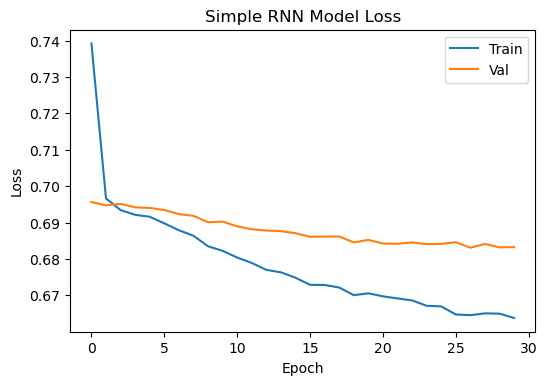

In [15]:
#Simple RNN Model Loss
plt.plot(history_simple.history['loss'])
plt.plot(history_simple.history['val_loss'])
plt.title('Simple RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [19]:
#DENSE MODEL

dense_model = tf.keras.Sequential()
dense_model.add(tf.keras.layers.Dense(units=115, activation='sigmoid', input_shape=(win_length, num_features)))
dense_model.add(tf.keras.layers.Dense(units=55, activation='sigmoid'))
dense_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_dense = dense_model.fit_generator(train_generator,epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Dense'] = dense_model.evaluate(val_generator)
performance['Dense'] = dense_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1626/1626 [==============================] - 14s 9ms/step - loss: 0.7032 - binary_accuracy: 0.5219 - precision_5: 0.5297 - recall_5: 0.5208 - auc_4: 0.5346 - val_loss: 0.7183 - val_binary_accuracy: 0.4543 - val_precision_5: 0.4543 - val_recall_5: 1.0000 - val_auc_4: 0.5380 9s - loss: 0.7285 - binary_accuracy: 0.5057 - precision_5: 0.5057 - recall_5: 0.3690 - auc_4:  - ETA: 9s - loss: 0.7216 - binary_accuracy: 0.5109 - precision_5: 0.4716 - recall_5: 0.4188 - - ETA: 9s - loss: 0.7352 - binary_accuracy: 0.4689 - precision_5: 0.4543 - recall_5: 0.4127 - auc - ETA: 9s - loss: 0.7302 - binary_accuracy: 0.4602 - precision_5: 0.4380 - recall_5: 0.3865 - auc_4: 0. - ETA: 9s - loss: 0.7298 - binary_accuracy: 0.4623 - precision_5: 0.4380 - recall_5: 0.3596 - - ETA: 8s - loss: 0.7226 - binary_accuracy: 0.4804 - precision_5: 0.4661 - recall_5: 0.3681 - auc_4 - ETA: 8s - loss: 0.7226 - binary_a - ETA: 6s - loss: 0.7139 - binary_accuracy: 0.5145 - prec - ETA: 5s - loss: 0.7075 - binary_a

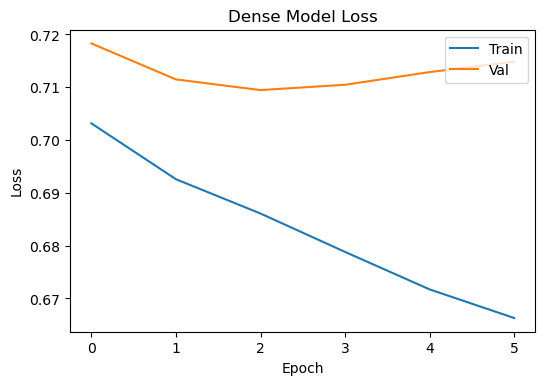

In [20]:
#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [21]:
#LSTM MODEL
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(39, input_shape=(win_length, num_features), return_sequences=True))
lstm_model.add(tf.keras.layers.Dropout(0.5))
lstm_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

lstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_lstm = lstm_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['LSTM'] = lstm_model.evaluate(val_generator)
performance['LSTM'] = lstm_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1626/1626 [==============================] - 15s 9ms/step - loss: 0.6914 - binary_accuracy: 0.5248 - precision_6: 0.5321 - recall_6: 0.5329 - auc_5: 0.5353 - val_loss: 0.6961 - val_binary_accuracy: 0.4993 - val_precision_6: 0.4710 - val_recall_6: 0.8287 - val_auc_5: 0.54900.69 - ETA: 1s - loss: 0.6913 - binary_a
Epoch 2/100
1626/1626 [==============================] - 14s 9ms/step - loss: 0.6797 - binary_accuracy: 0.5613 - precision_6: 0.5731 - recall_6: 0.5331 - auc_5: 0.5862 - val_loss: 0.6977 - val_binary_accuracy: 0.5065 - val_precision_6: 0.4748 - val_recall_6: 0.8133 - val_auc_5: 0.5579
Epoch 3/100
1626/1626 [==============================] - 14s 9ms/step - loss: 0.6701 - binary_accuracy: 0.5775 - precision_6: 0.5887 - recall_6: 0.5575 - auc_5: 0.6121 - val_loss: 0.6996 - val_binary_accuracy: 0.5087 - val_precision_6: 0.4760 - val_recall_6: 0.8077 - val_auc_5: 0.5628
Epoch 4/100
407/407 [==============================] - 3s 7ms/step - loss: 0.7025 - binary_accuracy: 0

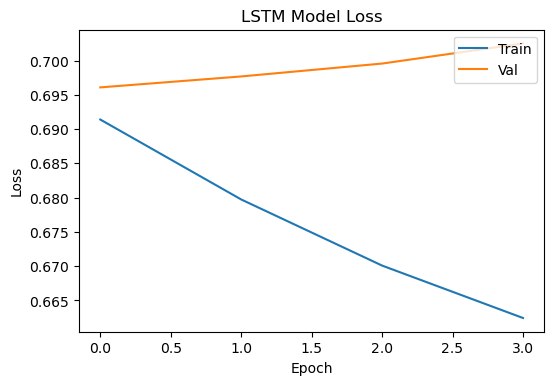

In [22]:
#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [23]:
#GRU MODEL

gru_model = tf.keras.models.Sequential()
gru_model.add(tf.keras.layers.GRU(64, return_sequences=True, input_shape=(win_length, num_features)))
gru_model.add(tf.keras.layers.Dropout(0.3))
gru_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

gru_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_gru = gru_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['GRU'] = gru_model.evaluate(val_generator)
performance['GRU'] = gru_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1626/1626 [==============================] - 15s 9ms/step - loss: 0.6917 - binary_accuracy: 0.5317 - precision_7: 0.5409 - recall_7: 0.5146 - auc_6: 0.5461 - val_loss: 0.7018 - val_binary_accuracy: 0.4932 - val_precision_7: 0.4686 - val_recall_7: 0.8632 - val_auc_6: 0.5497.5292 - - ETA: 8s - loss: 0.6997 - binary_accuracy: 0.5091 - precision_7: 0.5114 - recall_7: 0.55 - ETA: 7s - loss: 0.6972 - binary_accuracy: 0 - E
Epoch 2/100
1626/1626 [==============================] - 14s 9ms/step - loss: 0.6785 - binary_accuracy: 0.5647 - precision_7: 0.5728 - recall_7: 0.5619 - auc_6: 0.5911 - val_loss: 0.7028 - val_binary_accuracy: 0.4999 - val_precision_7: 0.4712 - val_recall_7: 0.8230 - val_auc_6: 0.55755466 - recall_7: 0.6137 - ETA: 6s - loss: 0.6805 - binary_accuracy: 0.5663 - precision_7: 0.5463 - recall_7: 0.5745 - ETA: 6s - loss: 0.6803 - binary_accuracy: 0.5672 - precision_7: 0.5567 - re - ETA: 5s - loss: 0.6793 - binary_accuracy: 0.5671 - precision_7: 0.5494 - recall_7: 0.5

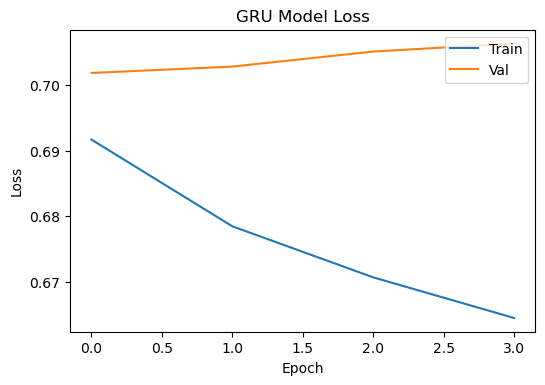

In [24]:
#GRU Model Loss
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

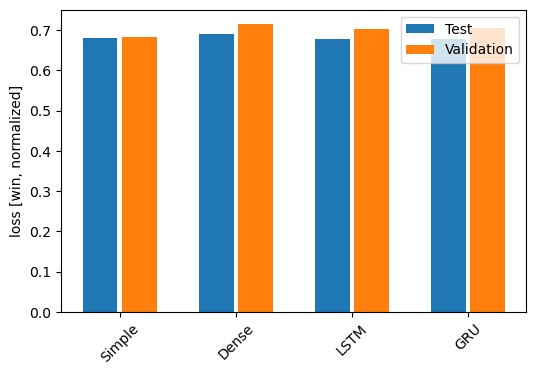

In [25]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('loss [win, normalized]')
plt.bar(x - 0.17, test_loss, width, label='Test')
plt.bar(x + 0.17, val_loss, width, label='Validation')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

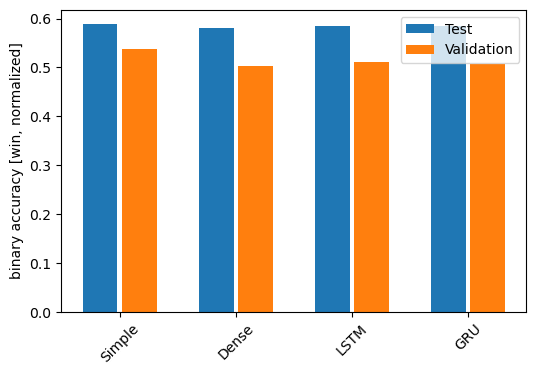

In [26]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'binary_accuracy'
metric_index = lstm_model.metrics_names.index('binary_accuracy')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('binary accuracy [win, normalized]')
plt.bar(x - 0.17, test_loss, width, label='Test')
plt.bar(x + 0.17, val_loss, width, label='Validation')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()